**Guided Project**: Police killings

This project will look at a dataset containing records of police shootings from January to June 2015

**Parts 1 & 2:** Introduction and Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

police_killings = pd.read_csv('data/police_killings.csv', encoding='ISO-8859-1')

print(police_killings.columns)
print(police_killings.head(5))

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')
                 name age gender    raceethnicity     month  day  year  \
0  A'donte Washington  16   Male            Black  February   23  2015   
1      Aaron Rutledge  27   Male            White     April    2  2015   
2         Aaron Siler  26   Male            White     March   14  2015   
3        Aaron Valdez  25   Male  Hispanic/Latino     March   11  2015   
4        Adam Jovicic  29   Male            White     March   19  2015   

            streetaddress          city state    ...     share_hispanic  \


**Part 3:** Shootings by Race

Percentage of Police Shootings Belonging to Each Race/Ethnicity
                              pct
White                   52.212389
Black                   29.867257
Hispanic/Latino         14.823009
Asian/Pacific Islander   2.212389
Native American          0.884956


Differences Between Percentage of Police Shootings and Population Percentage for Each Race/Ethnicity
                              pct
White                   -9.387611
Black                   16.567257
Hispanic/Latino         -2.776991
Asian/Pacific Islander  -3.587611
Native American         -0.315044




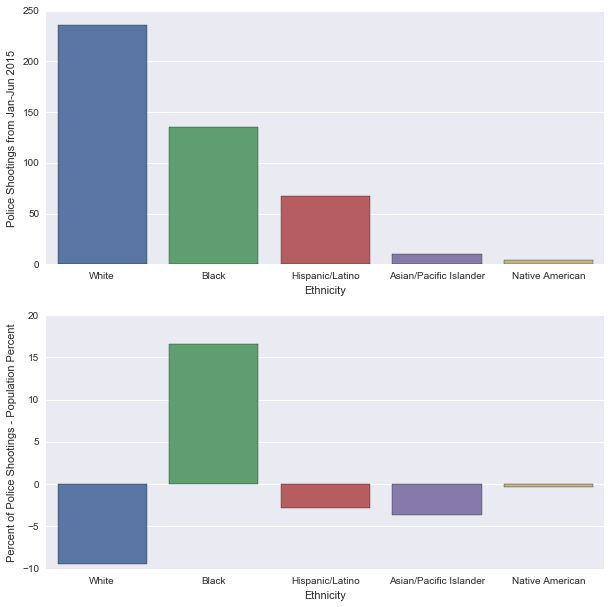

In [41]:
# US Population Stats (2015, from US Census)
race_per = {'White': 61.6, 'Black': 13.3, 'Hispanic/Latino': 17.6, 'Asian/Pacific Islander': 5.8, 'Native American': 1.2}

# This creates a DataFrame for counts of police shootings per ethnicity
by_race = police_killings['raceethnicity'].value_counts().to_frame('pct')
by_race = by_race[by_race.index != 'Unknown']

# This creates a DataFrame for relative percentages, excluding "Unknown"
by_race_per = (100*by_race) / by_race.sum()
print('Percentage of Police Shootings Belonging to Each Race/Ethnicity')
print(by_race_per)
print('\n')

# This creates a DataFrame for differences between an ethnicity's percentage of the population
# percentage of police shootings
def percent_diffs(row):
    if row.name in race_per:
        return row - race_per[row.name]
    else:
        return 0
    
relative = by_race_per.apply(percent_diffs, axis=1)
print('Differences Between Percentage of Police Shootings and Population Percentage for Each Race/Ethnicity')
print(relative)
print('\n')

# This creates the plots
fig = plt.figure(figsize=(10,10))
ax_1 = fig.add_subplot(2,1,1)
sns.barplot(x=by_race.index, y=by_race['pct'], ax=ax_1)
ax_1.set_xlabel('Ethnicity')
ax_1.set_ylabel('Police Shootings from Jan-Jun 2015')

ax_2 = fig.add_subplot(2,1,2)
sns.barplot(x=relative.index, y=relative['pct'], ax=ax_2)
ax_2.set_xlabel('Ethnicity')
ax_2.set_ylabel("Percent of Police Shootings - Population Percent")
plt.show()

**Discussion:** White people are the ones killed most often from police shootings, but when adjusted for population percentages, blacks are far more likely (on a per capita basis) to be shot.

**Notes:** The "Unknown" category was left out of the analysis above, because it provides no insight into ethnicity trends. The US statistics above also included ~2.6% of the population that identified as more than one race (counted separated), but that category was ignored for the comparison as well due to a lack of 1:1 category match.

**Part 4:** Shootings by Regional Income

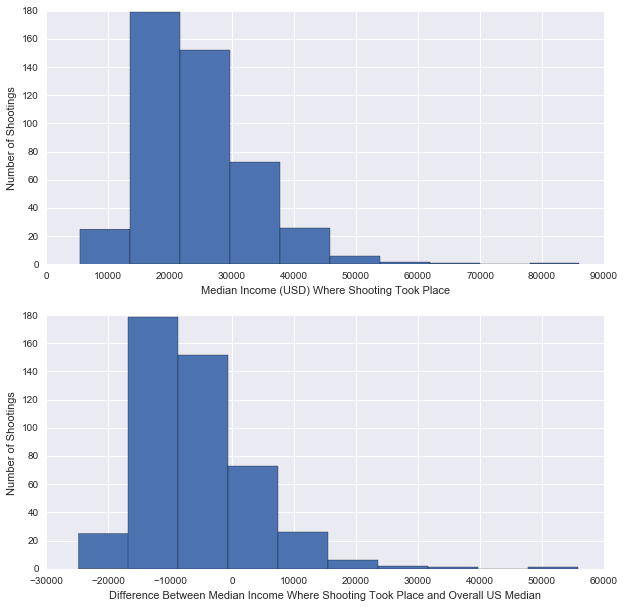

In [48]:
# US Median Personal Income in 2015
us_median = 30240
income = police_killings['p_income'].loc[police_killings['p_income'] != '-'].astype(int)
income_rel = income - us_median

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
income.hist(ax=ax1)
income_rel.hist(ax=ax2)
ax1.set_xlabel('Median Income (USD) Where Shooting Took Place')
ax1.set_ylabel('Number of Shootings')
ax2.set_xlabel('Difference Between Median Income Where Shooting Took Place and Overall US Median')
ax2.set_ylabel('Number of Shootings')
plt.show()

**Discussion:** The majority of shootings happened in poorer communities, relative to the US as a whole. Personal income is based on census-tract level data for the location of the killing and is not necessarily indicative of the income for the individual or their community. Many suspects are killed while fleeing the police, and the locations where they are stopped may have little to do with the locations where they live.

**Part 5:** Shootings By State

    STATE                  NAME  pop_millions  shootings      rate
4      40              Oklahoma      3.911338         22  5.624674
3       4               Arizona      6.828065         25  3.661359
27     31              Nebraska      1.896190          6  3.164240
34     15                Hawaii      1.431603          4  2.794071
39      2                Alaska      0.738432          2  2.708442
33     16                 Idaho      1.654930          4  2.417021
32     35            New Mexico      2.085109          5  2.397956
10     22             Louisiana      4.670724         11  2.355095
7       8              Colorado      5.456574         12  2.199182
41     10              Delaware      0.945934          2  2.114312
24     20                Kansas      2.911641          6  2.060694
26     28           Mississippi      2.992333          6  2.005124
19     41                Oregon      4.028977          8  1.985616
37     30               Montana      1.032949          2  1.93

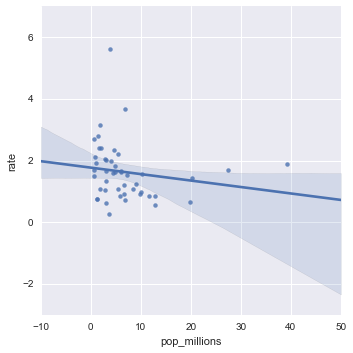

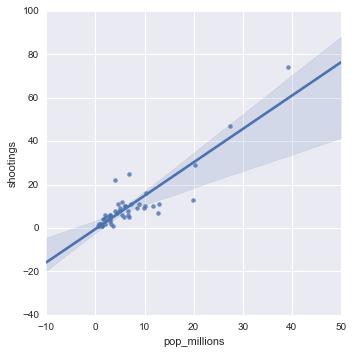

In [72]:
state_pop = pd.read_csv('data/state_population.csv')

counts = police_killings['state_fp'].value_counts()
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})
states = states.merge(state_pop, on='STATE')
states = states.assign(pop_millions = states['POPESTIMATE2015'] / 1000000)
states = states.assign(rate = states['shootings'] / states['pop_millions'])
sorted_states = states[['STATE','NAME','pop_millions','shootings','rate']].sort_values(by='rate', ascending=False)

print(sorted_states)

sns.lmplot(x='pop_millions', y='rate', data=states)
plt.show()
sns.lmplot(x='pop_millions', y='shootings', data=states)
plt.show()

**Discussion:** The state with the highest number of people shot by police per capita is Oklahoma. The lowest rate is observed in Connecticut. The differences likely reflect economic conditions in the states. However, it's worth being cautious about reading too much into rates when the absolute numbers are small. If you look at the plots of rate vs population and number of shootings vs population, you can see that states such as Oklahoma and Arizona are lower in population and therefore random variations are more likely to skew the rates significantly. It's possible that the ~10 extra shootings (relative to the baseline national trend) were related to specific events or were clustered somehow. One way to test the significance of those numbers is to look for geographic or temporal clusters and see if the shootings were more likely to be grouped than in other states closer to the baseline.

**Part 6:** State By State Differences

In [78]:
all_real_vals = (police_killings['share_white'] != '-') & \
(police_killings['share_black'] != '-') & \
(police_killings['share_hispanic'] != '-')

pk = police_killings.loc[all_real_vals]
pk = pk.assign(share_white = pk['share_white'].astype(float))
pk = pk.assign(share_black = pk['share_black'].astype(float))
pk = pk.assign(share_hispanic = pk['share_hispanic'].astype(float))

removed = police_killings.loc[all_real_vals != True]
print('REMOVED ROWS')
print(removed[['streetaddress','city']])
print('\n')

top_10_states = sorted_states['STATE'].head(10)
bottom_10_states = sorted_states['STATE'].tail(10)
is_in_top_10 = pk['state_fp'].isin(top_10_states)
is_in_bottom_10 = pk['state_fp'].isin(bottom_10_states)
desired_cols = ['state','share_white','share_black','share_hispanic','urate','college']
shootings_in_top_10 = pk[desired_cols].loc[is_in_top_10]
shootings_in_bottom_10 = pk[desired_cols].loc[is_in_bottom_10]

print('STATE-LEVEL AVERAGES OF COMMUNITIES WHERE SHOOTINGS OCCCURRED (10 STATES WITH HIGHEST RATES)')
print(pd.pivot_table(data=shootings_in_top_10, index='state'))
print('\n')
print('STATE-LEVEL AVERAGES OF COMMUNITIES WHERE SHOOTINGS OCCCURRED (10 STATES WITH LOWEST RATES)')
print(pd.pivot_table(data=shootings_in_bottom_10, index='state'))
print('\n')

print('AVERAGE COMMUNITY COMPOSITION FOR LOCATIONS WHERE SHOOTINGS OCCURRED (10 STATES WITH HIGHEST RATES)')
print(shootings_in_top_10.mean())
print('\n')
print('AVERAGE COMMUNITY COMPOSITION FOR LOCATIONS WHERE SHOOTINGS OCCURRED (10 STATES WITH LOWEST RATES)')
print(shootings_in_bottom_10.mean())
print('\n')

REMOVED ROWS
                                         streetaddress      city
182                         4600 International Gateway  Columbus
378  Louis Armstrong New Orleans International Airp...    Kenner


STATE-LEVEL AVERAGES OF COMMUNITIES WHERE SHOOTINGS OCCCURRED (10 STATES WITH HIGHEST RATES)
        college  share_black  share_hispanic  share_white     urate
state                                                              
AK     0.215967    11.400000       11.900000    37.950000  0.112907
AZ     0.213350     3.652000       34.444000    51.580000  0.122033
CO     0.272466     8.333333       30.883333    56.625000  0.102403
DE     0.256400    35.100000        4.150000    52.250000  0.100521
HI     0.319518     5.475000        5.050000    33.800000  0.110657
ID     0.229012     0.600000        8.725000    85.575000  0.093375
LA     0.122581    49.710000        7.860000    38.590000  0.131647
NE     0.280946     8.650000       10.300000    75.800000  0.055675
NM     0.290681  

**Discussion:** Shootings that happen in the states with the highest overall rates also tend to happen in communities with higher proportions of hispanic individuals. The communities where shootings occur also tend to have slightly lower unemployment rates and slightly higher college attendance rates.

**Additional Points:** The two samples that were removed due to incomplete ethnicity data were both events that happened at airports. Removing them should have no impact on the analysis. The other point, about using county data, has merit. Right now, county data are simply averaged without population weighting. This biases the data so that rural county percentages are given equal importance. In reality, we would want to convert county fractions to county numbers, add the numbers up by state, and then convert to state fractions.

**Part 7:** Next Steps

In the future, I may come back to further explore this dataset. For now, I will park this analysis.